# **STUNTING PREDICTION FROM PREGNANT DATA**

## **Import Library**

In [ ]:
#Import Library
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import joblib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from tensorflow.keras.layers import Input

## **Import Dataset**

In [ ]:
# Read csv
df = pd.read_csv('https://raw.githubusercontent.com/Arfi3/Stunting/main/data/Dataset_Final_Baru.csv')
# Display the first few rows of the DataFrame
print(df.head())

               Nama_Ibu                  Alamat  Kecamatan           Desa  \
0  Stephanus Champerlen        713 Welch Street   Illinois  United States   
1        Andrei Scupham       1275 Melrose Park  Tennessee  United States   
2           Olag Dumini  15 Mariners Cove Point      Texas  United States   
3         Efren Brevitt       64 Farragut Trail    Florida  United States   
4            Dunc Balls      17 Thackeray Trail      Texas  United States   

  Nomer_NIK TB_Ibu BB_Ibu IMT Usia_ibu Pendidikan_Ibu  ... JarakRumahKeYANKES  \
0  3.60E+15    157     50   2       32              1  ...          100 meter   
1  3.60E+15    146     48   2       37              1  ...          800 meter   
2  3.60E+15    154     71   3       35              2  ...          100 meter   
3  3.60E+15    159     86   3       29              2  ...          500 meter   
4  3.60E+15    153     71   3       33              1  ...          300 meter   

  IBU_PakaiKB    JenisKB Kepemilikan_BPJS Kewajiba

In [ ]:
df_baru=df[['TB_Ibu', 'BB_Ibu', 'IMT', 'Usia_ibu', 'Pendidikan_Ibu', 'Bumil_DapatFolat_Fe', 'Status_Stunting']]

In [ ]:
# Merubah 'Status_Stunting' menjadi kategorikal
df_baru['Status_Stunting'] = df_baru['Status_Stunting'].astype('category')
df_baru = df_baru.copy()
df_baru['Status_Stunting'].replace(['Tidak Stunting', 'Stunting'], [0, 1], inplace=True)

<ipython-input-4-259044b53089>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baru['Status_Stunting'] = df_baru['Status_Stunting'].astype('category')


In [ ]:
# Mengganti nilai yang mungkin merepresentasikan missing value dengan NaN
df_baru['TB_Ibu'] = df_baru['TB_Ibu'].replace(['#NULL!', ''], pd.NA)
# Menghapus baris yang berisi nilai NaN
df_baru = df_baru.dropna(subset=['TB_Ibu'])
df_baru['TB_Ibu'] = df_baru['TB_Ibu'].astype(float)

In [ ]:
# Mengganti nilai yang mungkin merepresentasikan missing value dengan NaN
df_baru['BB_Ibu'] = df_baru['BB_Ibu'].replace(['#NULL!', ''], pd.NA)
# Menghapus baris yang berisi nilai NaN
df_baru = df_baru.dropna(subset=['BB_Ibu'])
df_baru['BB_Ibu'] = df_baru['BB_Ibu'].astype(float)

In [ ]:
# Mengganti nilai yang mungkin merepresentasikan missing value dengan NaN
df_baru['IMT'] = df_baru['IMT'].replace(['#NULL!', ''], pd.NA)
# Menghapus baris yang berisi nilai NaN
df_baru = df_baru.dropna(subset=['IMT'])
df_baru['IMT'] = df_baru['IMT'].astype(float)

In [ ]:
# Mengganti nilai yang mungkin merepresentasikan missing value dengan NaN
df_baru['Usia_ibu'] = df_baru['Usia_ibu'].replace(['#NULL!', ''], pd.NA)
# Menghapus baris yang berisi nilai NaN
df_baru = df_baru.dropna(subset=['Usia_ibu'])
df_baru['Usia_ibu'] = df_baru['Usia_ibu'].astype(float)

<ipython-input-8-4cd97ab19e60>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baru['Usia_ibu'] = df_baru['Usia_ibu'].astype(float)


In [ ]:
# Merubah 'Pendidikan Ibu' menjadi kategorikal
df_baru['Pendidikan_Ibu'] = df_baru['Pendidikan_Ibu'].astype('category')

<ipython-input-9-f7c717358c01>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baru['Pendidikan_Ibu'] = df_baru['Pendidikan_Ibu'].astype('category')


In [ ]:
# Merubah 'Bumil_DapatFolat_Fe' menjadi kategorikal
df_baru['Bumil_DapatFolat_Fe'] = df_baru['Bumil_DapatFolat_Fe'].astype('category')

<ipython-input-10-52c71587ce4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baru['Bumil_DapatFolat_Fe'] = df_baru['Bumil_DapatFolat_Fe'].astype('category')


In [ ]:
df_baru.info()

<class 'pandas.core.frame.DataFrame'>
Index: 766 entries, 0 to 797
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   TB_Ibu               766 non-null    float64 
 1   BB_Ibu               766 non-null    float64 
 2   IMT                  766 non-null    float64 
 3   Usia_ibu             766 non-null    float64 
 4   Pendidikan_Ibu       766 non-null    category
 5   Bumil_DapatFolat_Fe  766 non-null    category
 6   Status_Stunting      766 non-null    category
dtypes: category(3), float64(4)
memory usage: 32.6 KB


In [ ]:
df_baru.describe()

,TB_Ibu,BB_Ibu,IMT,Usia_ibu
count,766.000000,766.000000,766.000000,766.000000
mean,149.895561,53.994648,2.302872,29.275457
std,6.498431,10.511089,0.858433,6.693561
min,129.000000,32.000000,1.000000,18.000000
25%,146.000000,46.000000,2.000000,24.000000
50%,150.000000,53.000000,2.000000,29.000000
75%,154.000000,60.000000,3.000000,34.000000
max,170.000000,95.000000,19.000000,73.000000


## **Clean Data**

In [ ]:
#Finding Missing Data
df_baru.isnull().sum()

TB_Ibu                 0
BB_Ibu                 0
IMT                    0
Usia_ibu               0
Pendidikan_Ibu         0
Bumil_DapatFolat_Fe    0
Status_Stunting        0
dtype: int64

In [ ]:
# Menghapus baris yang mengandung missing value
df_bersih = df_baru.dropna()


print("DataFrame setelah menghapus baris yang mengandung missing value:")
print(df_bersih)


DataFrame setelah menghapus baris yang mengandung missing value:
     TB_Ibu  BB_Ibu  IMT  Usia_ibu Pendidikan_Ibu Bumil_DapatFolat_Fe  \
0     157.0    50.0  2.0      32.0              1                   1   
1     146.0    48.0  2.0      37.0              1                   1   
2     154.0    71.0  3.0      35.0              2                   1   
3     159.0    86.0  3.0      29.0              2                   1   
4     153.0    71.0  3.0      33.0              1                   1   
..      ...     ...  ...       ...            ...                 ...   
793   151.0    48.0  2.0      30.0              2                   1   
794   147.0    51.0  2.0      33.0              1                   1   
795   149.0    53.0  2.0      35.0              2                   1   
796   141.0    43.0  2.0      20.0              2                   1   
797   157.0    62.0  2.0      21.0              3                   1   

    Status_Stunting  
0                 1  
1             

In [ ]:
# Menampilkan dataframe setelah imputasi
print(df_bersih.isna().sum())

TB_Ibu                 0
BB_Ibu                 0
IMT                    0
Usia_ibu               0
Pendidikan_Ibu         0
Bumil_DapatFolat_Fe    0
Status_Stunting        0
dtype: int64


In [ ]:
#Checking the Dimension of dataset
df_bersih.shape

(766, 7)

In [ ]:
print("Jumlah duplikasi: ", df_bersih.duplicated().sum())

Jumlah duplikasi:  35


In [ ]:
# Menghapus duplikasi berdasarkan semua kolom
df_no_duplicates = df_baru.drop_duplicates()

print(df_no_duplicates)

     TB_Ibu  BB_Ibu  IMT  Usia_ibu Pendidikan_Ibu Bumil_DapatFolat_Fe  \
0     157.0    50.0  2.0      32.0              1                   1   
1     146.0    48.0  2.0      37.0              1                   1   
2     154.0    71.0  3.0      35.0              2                   1   
3     159.0    86.0  3.0      29.0              2                   1   
4     153.0    71.0  3.0      33.0              1                   1   
..      ...     ...  ...       ...            ...                 ...   
793   151.0    48.0  2.0      30.0              2                   1   
794   147.0    51.0  2.0      33.0              1                   1   
795   149.0    53.0  2.0      35.0              2                   1   
796   141.0    43.0  2.0      20.0              2                   1   
797   157.0    62.0  2.0      21.0              3                   1   

    Status_Stunting  
0                 1  
1                 1  
2                 1  
3                 1  
4            

## **Visualitation**

<ipython-input-19-160e8e7e31a1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Status_Stunting", data=df_no_duplicates, palette="bwr")


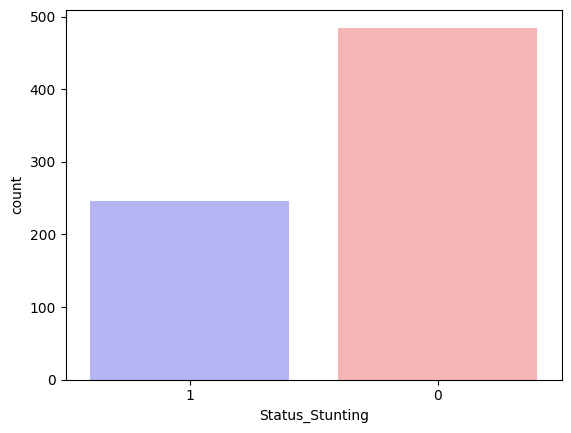

In [ ]:
# Data Exploration
# FOR LABEL
sns.countplot(x="Status_Stunting", data=df_no_duplicates, palette="bwr")
plt.show()

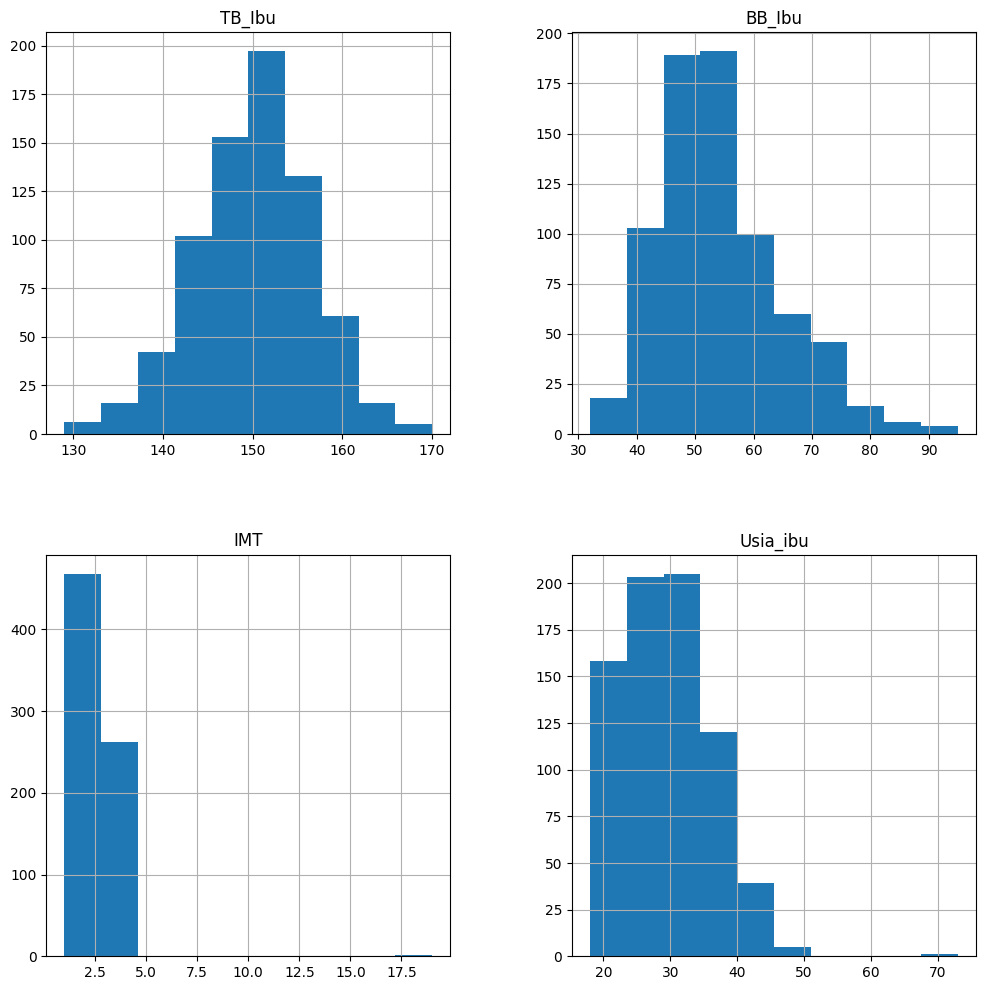

In [ ]:
# HISTOGRAM IN EACH VARIABLE
df_no_duplicates.hist(figsize = (12, 12))
plt.show()

## **Model Architecture**

In [ ]:
# Pisahkan fitur (X) dan label (y)
X = df_no_duplicates[['TB_Ibu', 'BB_Ibu', 'IMT', 'Usia_ibu', 'Pendidikan_Ibu', 'Bumil_DapatFolat_Fe']]
y = df_no_duplicates['Status_Stunting']

In [ ]:
numeric_features = ['TB_Ibu', 'BB_Ibu', 'IMT', 'Usia_ibu']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Pendidikan_Ibu', 'Bumil_DapatFolat_Fe']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)


In [ ]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
model = Sequential([
    Input(shape=(12,)),  # Input layer
    Dense(64, input_shape=(X_train_processed.shape[1],), activation='relu'),   # Hidden layer dengan 64 neuron dan fungsi aktivasi ReLU
    Dense(1, activation='sigmoid')  # Output layer dengan 1 neuron dan fungsi aktivasi Sigmoid untuk klasifikasi biner
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_processed, y_train, epochs=100, batch_size=128, validation_data=(X_test_processed, y_test))

Epoch 1/100
5/5 [==============================] - 3s 174ms/step - loss: 0.7196 - accuracy: 0.5428 - val_loss: 0.6795 - val_accuracy: 0.6259
Epoch 2/100
5/5 [==============================] - 0s 31ms/step - loss: 0.6962 - accuracy: 0.5479 - val_loss: 0.6576 - val_accuracy: 0.6327
Epoch 3/100
5/5 [==============================] - 0s 24ms/step - loss: 0.6768 - accuracy: 0.6079 - val_loss: 0.6414 - val_accuracy: 0.6599
Epoch 4/100
5/5 [==============================] - 0s 19ms/step - loss: 0.6632 - accuracy: 0.6370 - val_loss: 0.6303 - val_accuracy: 0.6939
Epoch 5/100
5/5 [==============================] - 0s 24ms/step - loss: 0.6543 - accuracy: 0.6507 - val_loss: 0.6227 - val_accuracy: 0.6735
Epoch 6/100
5/5 [==============================] - 0s 24ms/step - loss: 0.6476 - accuracy: 0.6575 - val_loss: 0.6179 - val_accuracy: 0.6735
Epoch 7/100
5/5 [==============================] - 0s 76ms/step - loss: 0.6434 - accuracy: 0.6558 - val_loss: 0.6149 - val_accuracy: 0.6803
Epoch 8/100
5/5 [==

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_processed, y_test)
print('Test accuracy:', test_accuracy)

5/5 [==============================] - 0s 5ms/step - loss: 0.6237 - accuracy: 0.6939
Test accuracy: 0.6938775777816772


In [ ]:
# Prediksi label dari data test
y_pred = model.predict(X_test_processed)

# Konversi prediksi probabilitas menjadi label biner (0 atau 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluasi model
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred_binary))
print("Matriks Kebingungan:\n", confusion_matrix(y_test, y_pred_binary))

5/5 [==============================] - 0s 4ms/step
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.69      0.98      0.81        99
           1       0.71      0.10      0.18        48

    accuracy                           0.69       147
   macro avg       0.70      0.54      0.50       147
weighted avg       0.70      0.69      0.61       147

Matriks Kebingungan:
 [[97  2]
 [43  5]]


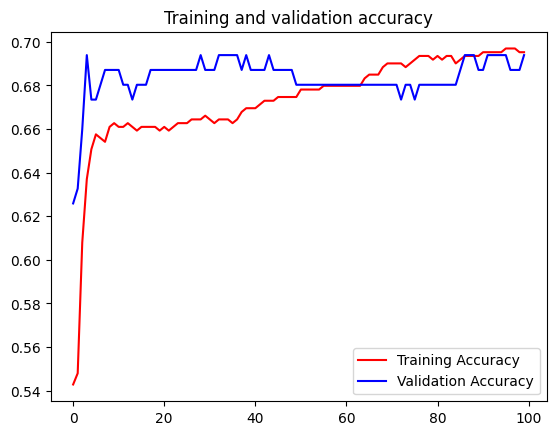

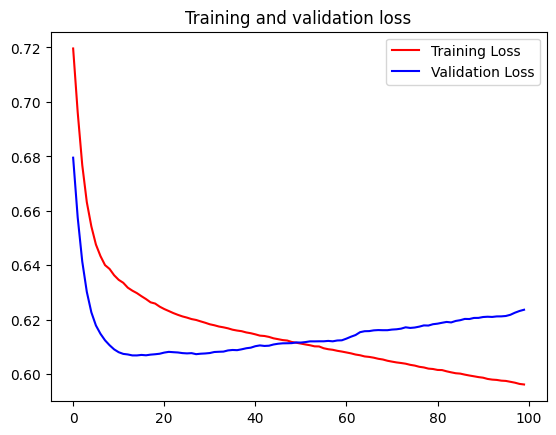

In [ ]:
# Plotting akurasi dan loss selama pelatihan
# Retrieve a list of list results on training and test data sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))  # Get number of epochs

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend()  # Add legend to the plot
plt.show()
print("")

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and validation loss')
plt.legend()  # Add legend to the plot
plt.show()

In [ ]:
df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 731 entries, 0 to 797
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   TB_Ibu               731 non-null    float64 
 1   BB_Ibu               731 non-null    float64 
 2   IMT                  731 non-null    float64 
 3   Usia_ibu             731 non-null    float64 
 4   Pendidikan_Ibu       731 non-null    category
 5   Bumil_DapatFolat_Fe  731 non-null    category
 6   Status_Stunting      731 non-null    category
dtypes: category(3), float64(4)
memory usage: 31.2 KB


In [ ]:
df_no_duplicates['Pendidikan_Ibu'].value_counts()

Pendidikan_Ibu
1    299
2    236
3    153
4     28
0     15
Name: count, dtype: int64

In [ ]:
def detection():
    Name = input("Masukan Nama Anda: ")
    TB_Ibu = float(input("Berapa Tinggi Badan Anda: "))
    BB_Ibu = float(input("Berapa Berat Badan Anda: "))
    Usia_ibu = float(input("Berapa Usia Anda saat ini: "))
    Usia_kehamilan = int(input("berapa usia kehamilan Anda saat ini berapa minggu:"))
    Pendidikan_Ibu = int(input("Pendidikan terakhir Anda (0: Tidak Sekolah, 1: SD, 2: SMP, 3: SMA, 4: Sarjana): "))
    Bumil_DapatFolat_Fe = int(input("Apakah mendapatkan Folat saat hamil (0: No, 1: Yes): "))

    print("Pilih tingkat aktivitas Anda:")
    print("1: Tidak aktif (sedikit atau tidak ada olahraga)")
    print("2: Sedikit aktif (olahraga ringan/olahraga 1-3 hari/minggu)")
    print("3: Cukup aktif (olahraga sedang/olahraga 3-5 hari/minggu)")
    print("4: Sangat aktif (olahraga keras 6-7 hari/minggu)")
    print("5: Sangat aktif ekstra (olahraga sangat keras & pekerjaan fisik)")
    activity_level_input = int(input("Masukkan pilihan tingkat aktivitas Anda (1-5): "))

    activity_multipliers = {
        1: 1.2,
        2: 1.375,
        3: 1.55,
        4: 1.725,
        5: 1.9
    }

    activity_level = activity_multipliers.get(activity_level_input, 1.2)  # Default to 'sedentary' if invalid input

    tinggi_meter = TB_Ibu / 100
    IMT = BB_Ibu / (tinggi_meter ** 2)
    # Klasifikasi IMT
    if IMT < 18.5:
        imt_status = "Kekurangan berat badan (Underweight)"
        recommendation = "Anda perlu meningkatkan asupan kalori dan protein Anda. Konsumsi makanan padat gizi seperti daging tanpa lemak, ikan, produk susu, kacang-kacangan, biji-bijian, buah, dan sayuran. Konsultasikan dengan ahli gizi untuk rencana diet yang lebih spesifik."
    elif 18.5 <= IMT < 24.9:
        imt_status = "Berat badan normal (Normal weight)"
        recommendation = "Anda memiliki berat badan yang sehat. Pertahankan pola makan seimbang dengan berbagai makanan dari semua kelompok makanan. Pastikan untuk mengonsumsi cukup protein, karbohidrat, lemak sehat, serta vitamin dan mineral."
    elif 25 <= IMT < 29.9:
        imt_status = "Kelebihan berat badan (Overweight)"
        recommendation = "Anda berada dalam kategori kelebihan berat badan. Pertimbangkan untuk mengurangi asupan kalori, terutama dari makanan berlemak tinggi dan manis. Tingkatkan aktivitas fisik dan fokus pada makanan kaya serat seperti buah, sayuran, dan biji-bijian utuh."
    elif 30 <= IMT < 34.9:
        imt_status = "Obesitas Kelas I (Obesity Class I)"
        recommendation = "Anda berada dalam kategori obesitas. Penting untuk mengurangi asupan kalori dan meningkatkan aktivitas fisik. Konsultasikan dengan penyedia layanan kesehatan untuk rencana penurunan berat badan yang aman dan efektif."
    elif 35 <= IMT < 39.9:
        imt_status = "Obesitas Kelas II (Obesity Class II)"
        recommendation = "Anda berada dalam kategori obesitas tingkat dua. Mengurangi berat badan akan bermanfaat bagi kesehatan Anda. Pertimbangkan program diet dan latihan yang diawasi oleh profesional kesehatan."
    else:
        imt_status = "Obesitas Kelas III (Obesity Class III)"
        recommendation = "Anda berada dalam kategori obesitas tingkat tiga. Ini adalah kondisi yang serius dan Anda disarankan untuk mencari bantuan medis untuk rencana penurunan berat badan yang komprehensif."

    # Buat array numpy dengan data yang dimasukkan, tambahkan 6 fitur lagi
    data = np.array([[TB_Ibu, BB_Ibu, IMT, Usia_ibu, Pendidikan_Ibu, Bumil_DapatFolat_Fe,
                      TB_Ibu, BB_Ibu, IMT, Usia_ibu, Pendidikan_Ibu, Bumil_DapatFolat_Fe]])
    numeric_features = ['TB_Ibu', 'BB_Ibu', 'IMT', 'Usia_ibu']
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])

    categorical_features = ['Pendidikan_Ibu', 'Bumil_DapatFolat_Fe']
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])
    deteksi = model.predict(data)
    print(deteksi)
    print("\n")
    detection_result = deteksi[0]

        # Determine stunting status
    stunting_status = 'stunting' if detection_result > 0.5 else 'sehat'
    if stunting_status == 'stunting':
        print("Anak anda bisa saja terindikasi STUNTING, jagalah kesehatan tubuh dengan memenuhi asupan gizi selama kehamilan")
    else:
        print("Anak anda terindikasi Normal")

    # Nutrition
    tinggi_meter = TB_Ibu / 100  # Convert height to meters
    IMT = BB_Ibu / (tinggi_meter ** 2)
    BBI = (TB_Ibu - 100) - (TB_Ibu - 100) * 0.1
    BBIH = BBI + (Usia_kehamilan * 0.35)
    BEE= 655 + (9.6 * BB_Ibu) + (1.85 * TB_Ibu) - (4.68 * Usia_ibu)

    # Menentukan kondisi kehamilan dan faktor koreksi
    if Usia_kehamilan <= 13:
        correction_factor = 5
    elif Usia_kehamilan <= 23:
        correction_factor = 10
    else:
        correction_factor = 15

    # Total Daily Energy Expenditure (TDEE)
    TDEE = BEE * activity_level * (1 + (correction_factor / 100.0))

    # Print nutrition summary
    print(f"\nRangkuman Gizi yang dibutuhkan {Name} :")
    print(f"Indeks Massa Tubuh: {IMT:.2f} ({imt_status}).")
    print(recommendation)
    print(f"Berat Badan Ideal pada usia kehamilan : {BBIH:.2f} kg")
    print(f"Jumlah energi yang dibutuhkan oleh tubuh: {BEE:.2f} kalori")
    print(f"Jumlah total energi yang dibutuhkan oleh tubuh: {TDEE:.2f} kalori")

detection()

Masukan Nama Anda: arfi
Berapa Tinggi Badan Anda: 120
Berapa Berat Badan Anda: 30
Berapa Usia Anda saat ini: 15
berapa usia kehamilan Anda saat ini berapa minggu:7
Pendidikan terakhir Anda (0: Tidak Sekolah, 1: SD, 2: SMP, 3: SMA, 4: Sarjana): 2
Apakah mendapatkan Folat saat hamil (0: No, 1: Yes): 1
Pilih tingkat aktivitas Anda:
1: Tidak aktif (sedikit atau tidak ada olahraga)
2: Sedikit aktif (olahraga ringan/olahraga 1-3 hari/minggu)
3: Cukup aktif (olahraga sedang/olahraga 3-5 hari/minggu)
4: Sangat aktif (olahraga keras 6-7 hari/minggu)
5: Sangat aktif ekstra (olahraga sangat keras & pekerjaan fisik)
Masukkan pilihan tingkat aktivitas Anda (1-5): 3
1/1 [==============================] - 0s 31ms/step
[[6.54833e-14]]


Anak anda terindikasi Normal

Rangkuman Gizi yang dibutuhkan arfi :
Indeks Massa Tubuh: 20.83 (Berat badan normal (Normal weight)).
Anda memiliki berat badan yang sehat. Pertahankan pola makan seimbang dengan berbagai makanan dari semua kelompok makanan. Pastikan untuk

In [ ]:
# Saving model
# Calling `save('my_model.h5')` creates a h5 file `my_model.h5`.
model.save("model_ibuhamil_stunting.h5")

# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("model_ibuhamil_stunting.h5")

#tflite

In [ ]:
print('\u2022 Using TensorFlow Version:', tf.__version__)

• Using TensorFlow Version: 2.15.0


In [ ]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [ ]:
import pathlib
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

5236

In [ ]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
# Test the TensorFlow Lite model on random input data.
input_shape = input_details[0]['shape']
inputs, outputs = [], []
for _ in range(100):
    input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)

    interpreter.invoke()
    tflite_results = interpreter.get_tensor(output_details[0]['index'])

    # Test the TensorFlow model on random input data.
    tf_results = model(tf.constant(input_data))
    output_data = np.array(tf_results)

    inputs.append(input_data[0][0])
    outputs.append(output_data[0][0])

In [ ]:
try:
    from google.colab import files
    files.download(tflite_model_file)
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>